# Haar Cascades

Machine learning-based object detection algorithms. They are designed to detect specific objects or features in images or videos.

* Haarcascades use a Haar-like features extraction method, which is a simple rectangular filter applied to the image, to detect objects or features.

* They are computationally efficient and can be run in real-time on standard hardware.

* Haarcascades are trained using positive and negative samples. Positive samples are images containing the object of interest, and negative samples are images without the object.

* Haarcascades can be used for face detection, body detection, and other object detection tasks.

* Haarcascades are a popular choice for object detection in computer vision due to their simplicity, accuracy, and computational efficiency.


## Setup the Libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Download the Data and Classifiers

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/64/Group_Pictures_%286370038335%29.jpg # Imnage for eye and face
!wget https://upload.wikimedia.org/wikipedia/commons/9/91/People_walking_along_the_promenade_in_front_of_the_Palace_of_Education_at_the_1904_World%27s_Fair._Colonnade_of_States_visible_in_the_distance.jpg

# Get the classifiers
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_fullbody.xml
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml

--2023-02-03 14:02:46--  https://upload.wikimedia.org/wikipedia/commons/6/64/Group_Pictures_%286370038335%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318664 (311K) [image/jpeg]
Saving to: ‘Group_Pictures_(6370038335).jpg.1’

Group_Pictures_(637 100%[===================>] 311.20K  1.67MB/s    in 0.2s    

2023-02-03 14:02:47 (1.67 MB/s) - ‘Group_Pictures_(6370038335).jpg.1’ saved [318664/318664]

--2023-02-03 14:02:47--  https://upload.wikimedia.org/wikipedia/commons/9/91/People_walking_along_the_promenade_in_front_of_the_Palace_of_Education_at_the_1904_World%27s_Fair._Colonnade_of_States_visible_in_the_distance.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.

## Face Detection

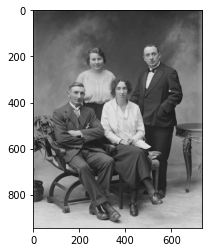

In [ ]:
# Read the image
gray = cv2.imread('Group_Pictures_(6370038335).jpg')
plt.imshow(gray)

In [ ]:
# Instantiate the classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

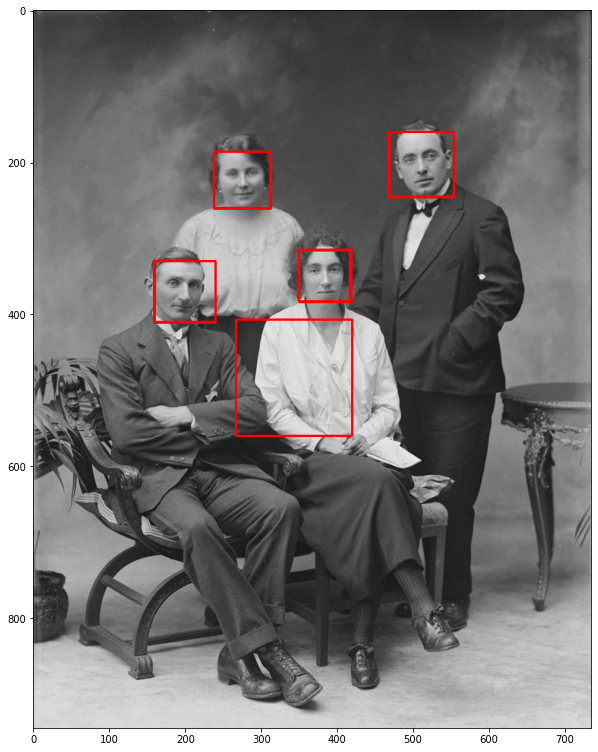

In [ ]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.08, 8)

for (x, y, w, h) in faces:
    img = cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Plot the images
plt.figure(figsize=(10, 15))
plt.imshow(img)

Identifies 1 false positive, is their ways to improve this even more?

## Eye Detection

In [ ]:
# Instantiate the classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

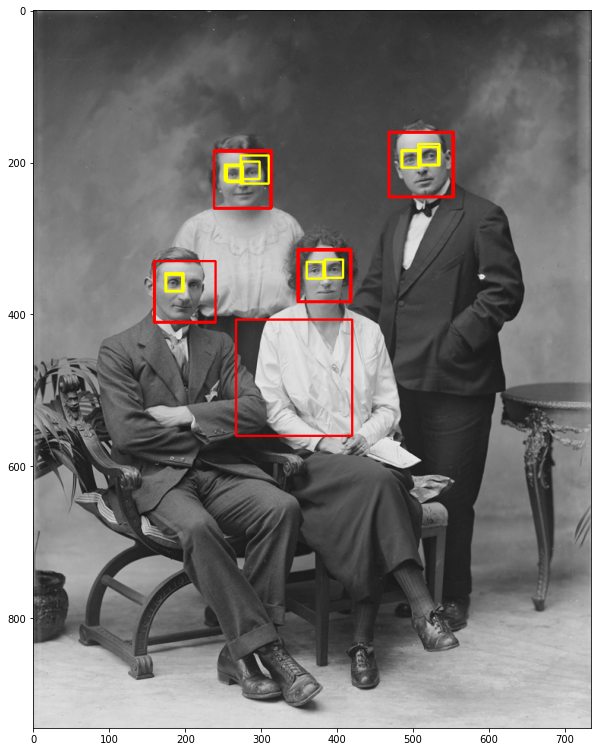

In [ ]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.08, 8)

for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect Eyes
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

# Plot the images
plt.figure(figsize=(10, 15))
plt.imshow(img)

## Full Body Detection

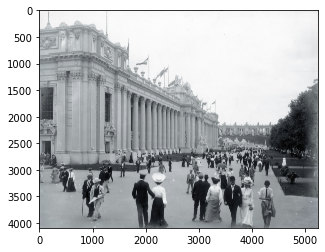

In [ ]:
# Reread the image as a clean slate
gray = cv2.imread('People_walking_along_the_promenade_in_front_of_the_Palace_of_Education_at_the_1904_World\'s_Fair._Colonnade_of_States_visible_in_the_distance.jpg')
plt.imshow(gray)

In [ ]:
# Full Body Cascade
full_body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

17


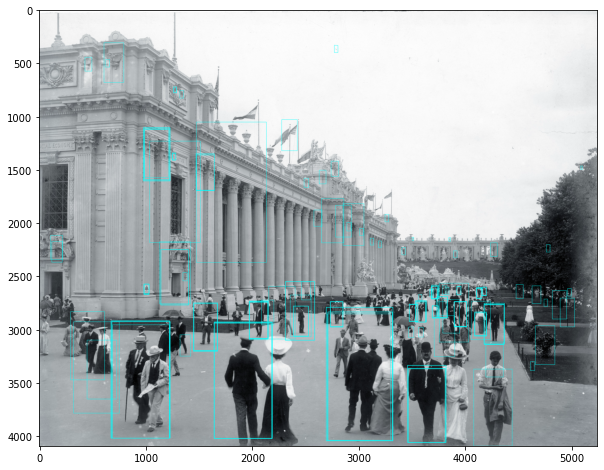

In [ ]:
# Pass frame to our body classifier
bodies = full_body_cascade.detectMultiScale(gray, 1.05, 10)
print(len(bodies))

# Extract bounding boxes for any bodies identified
for (x,y,w,h) in bodies:
    img2 = cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 255), 4)

# Plot the images
plt.figure(figsize=(10, 15))
plt.imshow(img2)

Not as good as it could be with a lot of false positives being detected. Play around with the parameters of `detectMultiScale` to see different results